In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from census import Census
from scipy.stats import linregress

In [2]:
fast_food = "resources/clean_fast_food.csv"
clean_fast_food = pd.read_csv(fast_food, encoding="utf-8")
clean_fast_food

,Index,Address,Category,City,Country,Latitude,Longitude,Name,ZipCode,State
0,0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,Louisiana
1,2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,Tennessee
2,3,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,Tennessee
3,4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,Georgia
4,5,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,42.368823,-83.138251,Wendy's,48204,Michigan
...,...,...,...,...,...,...,...,...,...,...
9297,9995,3460 Robinhood Rd,Fast Food Restaurants,Winston-Salem,US,36.117563,-80.316553,Pizza Hut,27106,North Carolina
9298,9996,3069 Kernersville Rd,Fast Food Restaurants,Winston-Salem,US,36.077718,-80.176748,Pizza Hut,27107,North Carolina
9299,9997,838 S Main St,Fast Food Restaurants,Kernersville,US,36.111015,-80.089165,Pizza Hut,27284,North Carolina
9300,9998,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,35.719981,-77.945795,Pizza Hut,27893,North Carolina


In [3]:
### Data Cleanup 
# Census data
# Census API Key

url = 'http://api.census.gov/data/2020/dec/pl?get=NAME,H1_001N&for=state:*'

api_key= '752da6eb56cbdcaaf6581393eadf3c469555616f'
c = Census(api_key, year=2021)

census_data = requests.get(url).json()

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)
census_pd.columns = ["State", "Total Population", "State Number"]
census_pd

,State,Total Population,State Number
0,NAME,H1_001N,state
1,Alabama,2288330,01
2,Alaska,326200,02
3,Arizona,3082000,04
4,Arkansas,1365265,05
5,California,14392140,06
6,Colorado,2491404,08
7,Connecticut,1530197,09
8,Delaware,448735,10
9,District of Columbia,350364,11


In [4]:
census_pd = census_pd.drop(census_pd.index[0])
census_pd

,State,Total Population,State Number
1,Alabama,2288330,01
2,Alaska,326200,02
3,Arizona,3082000,04
4,Arkansas,1365265,05
5,California,14392140,06
6,Colorado,2491404,08
7,Connecticut,1530197,09
8,Delaware,448735,10
9,District of Columbia,350364,11
10,Idaho,751859,16


In [5]:
resturant_count=clean_fast_food.groupby(["State", "Name"]).count()["Index"]
resturant_count

State    Name          
Alabama  Chick-fil-A       1
         Krystal           2
         Taco Bell         3
Alaska   Ak Buffet         1
         Arby's            1
                          ..
Wyoming  SONIC Drive In    1
         Subway            2
         Taco Bell         1
         Taco John's       1
         Wendy's           1
Name: Index, Length: 1619, dtype: int64

In [6]:
state_count = clean_fast_food.groupby("State").count()["Index"]
state_count

State
Alabama              6
Alaska              14
Arizona            295
Arkansas            90
California        1111
Colorado           135
Connecticut         51
Delaware            38
Florida            574
Georgia            391
Hawaii              30
Idaho               50
Illinois           372
Indiana            235
Iowa               108
Kansas              67
Kentucky           154
Louisiana          194
Maine               23
Maryland           161
Massachusetts      195
Michigan           349
Minnesota          181
Mississippi         52
Missouri           151
Montana             34
Nebraska            85
Nevada             115
New Hampshire       27
New Jersey         121
New Mexico          70
New York           326
North Carolina     283
North Dakota        34
Ohio               501
Oklahoma           160
Oregon             143
Pennsylvania       360
Rhode Island        13
South Carolina     176
South Dakota        40
Tennessee          280
Texas              753
Utah 

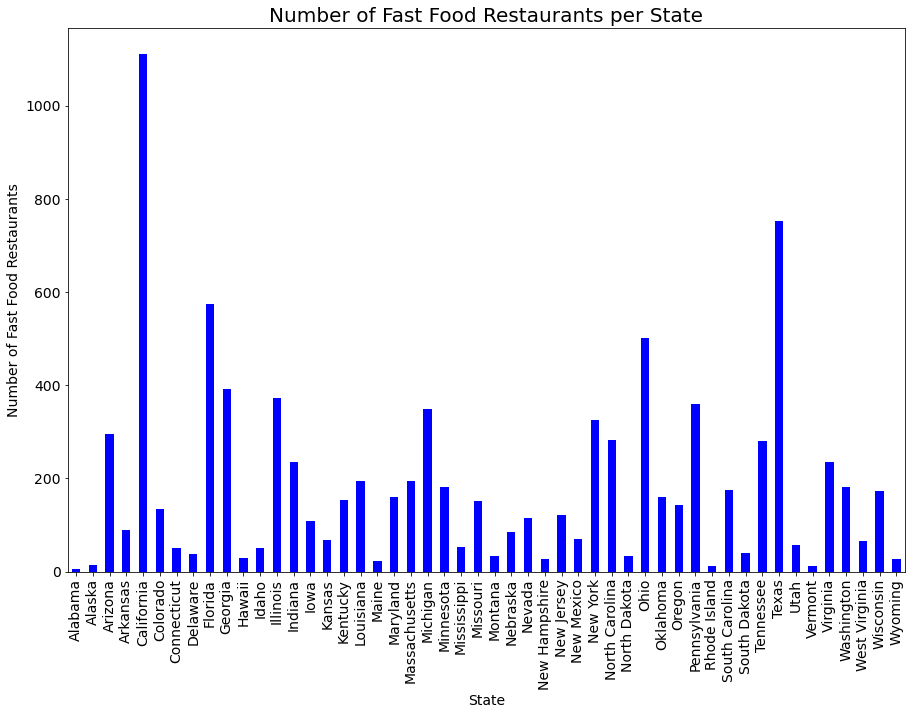

In [7]:
plot_pandas =  state_count.plot.bar (figsize = (15,10), color = 'b', fontsize = 14)
state_count
plt.xlabel('State', fontsize = 14)
plt.ylabel('Number of Fast Food Restaurants', fontsize = 14)
plt.title('Number of Fast Food Restaurants per State', fontsize =20)
plt.savefig('Number of Fast Food Restaurants per State.png')
plt.show()


In [8]:
fast_food_census= pd.merge(state_count, census_pd, how = 'inner', on = 'State')
fast_food_census.head()

,State,Index,Total Population,State Number
0,Alabama,6,2288330,01
1,Alaska,14,326200,02
2,Arizona,295,3082000,04
3,Arkansas,90,1365265,05
4,California,1111,14392140,06


In [9]:
fast_food_census.columns = ['State',
'Number of Restaurants',
'Total Population',
'Number of Restaurants/Tot Population']
                            
fast_food_census.head()

,State,Number of Restaurants,Total Population,Number of Restaurants/Tot Population
0,Alabama,6,2288330,01
1,Alaska,14,326200,02
2,Arizona,295,3082000,04
3,Arkansas,90,1365265,05
4,California,1111,14392140,06


In [10]:
fast_food_census.dtypes
fast_food_census["Total Population"] =pd.to_numeric(fast_food_census["Total Population"])
fast_food_census["Total Population"].dtype

dtype('int64')

In [11]:
fast_food_census ["Number of Restaurants/Tot Population"] = fast_food_census ["Number of Restaurants"]/ fast_food_census ["Total Population"]
fast_food_census

,State,Number of Restaurants,Total Population,Number of Restaurants/Tot Population
0,Alabama,6,2288330,0.000003
1,Alaska,14,326200,0.000043
2,Arizona,295,3082000,0.000096
3,Arkansas,90,1365265,0.000066
4,California,1111,14392140,0.000077
5,Colorado,135,2491404,0.000054
6,Connecticut,51,1530197,0.000033
7,Delaware,38,448735,0.000085
8,Florida,574,9865350,0.000058
9,Georgia,391,4410956,0.000089


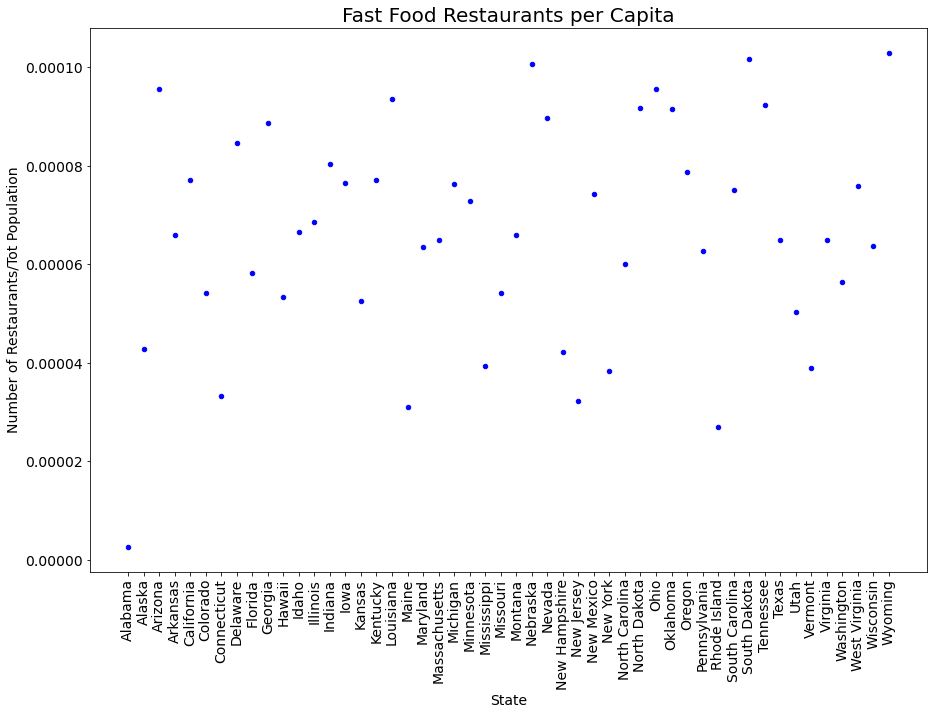

In [12]:
plot_ff_capita =  fast_food_census.plot.scatter ('State','Number of Restaurants/Tot Population',figsize = (15,10), color = 'b', fontsize = 14)
plt.xlabel('State', fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('Number of Restaurants/Tot Population', fontsize = 14)
plt.title('Fast Food Restaurants per Capita', fontsize =20)
plt.savefig('Fast Food Restaurants per Capita.png')
plt.show()

In [13]:
column_1=fast_food_census['Number of Restaurants']
column_2=fast_food_census['Total Population']
correlation = column_1.corr(column_2)
correlation

0.9517519609370277